In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Use the citipy module to determine city based on lat. and long.
from citipy import citipy

In [4]:
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
import requests

In [7]:
#import weather api
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging
print("Beginning Data retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data retrieval     
-----------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | faya
Processing Record 5 of Set 1 | turukhansk
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | tubuala
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | merauke
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | deputatskiy
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | enshi
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | flinders
Processing Record 22 of Set 1 | colares
Processing Record 23 of Set 1 | pa

Processing Record 39 of Set 4 | maarianhamina
Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | narasaraopet
Processing Record 42 of Set 4 | vaini
Processing Record 43 of Set 4 | muskegon
Processing Record 44 of Set 4 | goderich
Processing Record 45 of Set 4 | lasa
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | olinda
Processing Record 50 of Set 4 | harper
Processing Record 1 of Set 5 | tilichiki
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | humberto de campos
Processing Record 4 of Set 5 | saint-louis
Processing Record 5 of Set 5 | yilan
Processing Record 6 of Set 5 | kenai
Processing Record 7 of Set 5 | palana
Processing Record 8 of Set 5 | teguldet
Processing Record 9 of Set 5 | tual
Processing Record 10 of Set 5 | kaitangata
Processing Record 11 of Set 5 | oron
Processing Record 12 of Set 5 

Processing Record 29 of Set 8 | maniitsoq
Processing Record 30 of Set 8 | asau
Processing Record 31 of Set 8 | rengasdengklok
Processing Record 32 of Set 8 | coquimbo
Processing Record 33 of Set 8 | duvan
Processing Record 34 of Set 8 | cedar city
Processing Record 35 of Set 8 | iqaluit
Processing Record 36 of Set 8 | abonnema
Processing Record 37 of Set 8 | carutapera
Processing Record 38 of Set 8 | gazojak
Processing Record 39 of Set 8 | ust-tsilma
Processing Record 40 of Set 8 | uruzgan
Processing Record 41 of Set 8 | villa maria
Processing Record 42 of Set 8 | rundu
Processing Record 43 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 44 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 45 of Set 8 | kloulklubed
Processing Record 46 of Set 8 | bulgan
Processing Record 47 of Set 8 | kamakhyanagar
Processing Record 48 of Set 8 | turbat
Processing Record 49 of Set 8 | craig
Processing Record 50 of Set 8 | umzimvubu
City not found. Skipping...


Processing Record 15 of Set 12 | gamba
Processing Record 16 of Set 12 | qaqortoq
Processing Record 17 of Set 12 | pio xii
Processing Record 18 of Set 12 | yaransk
Processing Record 19 of Set 12 | zhuanghe
Processing Record 20 of Set 12 | boysun
Processing Record 21 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 22 of Set 12 | owensboro
Processing Record 23 of Set 12 | kropotkin
Processing Record 24 of Set 12 | hofn
Processing Record 25 of Set 12 | gao
Processing Record 26 of Set 12 | bima
Processing Record 27 of Set 12 | lluta
Processing Record 28 of Set 12 | sarkand
Processing Record 29 of Set 12 | envira
Processing Record 30 of Set 12 | sayyan
Processing Record 31 of Set 12 | gat
Processing Record 32 of Set 12 | ahuimanu
Processing Record 33 of Set 12 | kaeo
Processing Record 34 of Set 12 | barahona
Processing Record 35 of Set 12 | vila
Processing Record 36 of Set 12 | aykhal
Processing Record 37 of Set 12 | necochea
Processing Record 38 of Set 12 | zhigansk
P

In [11]:
#Find how many good records were retrieved
len(city_data)

576

In [12]:
#Convert list into pandas Df
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,45.82,81,100,2.21,GL,2022-09-28 17:55:21
1,Jamestown,42.0970,-79.2353,57.52,64,100,11.50,US,2022-09-28 17:50:39
2,Arraial Do Cabo,-22.9661,-42.0278,71.56,88,100,14.97,BR,2022-09-28 17:55:21
3,Faya,18.3851,42.4509,72.12,32,10,5.23,SA,2022-09-28 17:55:22
4,Turukhansk,65.8167,87.9833,24.76,77,21,10.29,RU,2022-09-28 17:55:22
5,Tuktoyaktuk,69.4541,-133.0374,28.40,93,75,5.75,CA,2022-09-28 17:55:23
6,Yellowknife,62.4560,-114.3525,46.92,66,75,12.66,CA,2022-09-28 17:55:23
7,Hamilton,39.1834,-84.5333,59.52,66,100,13.80,US,2022-09-28 17:53:22
8,Kapaa,22.0752,-159.3190,80.58,87,14,9.86,US,2022-09-28 17:55:24
9,Tubuala,9.5167,-79.0333,83.46,73,98,5.70,PA,2022-09-28 17:55:24


In [13]:
#Change the order of the DF columns
new_column_order= ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2022-09-28 17:55:21,60.9167,-46.0500,45.82,81,100,2.21
1,Jamestown,US,2022-09-28 17:50:39,42.0970,-79.2353,57.52,64,100,11.50
2,Arraial Do Cabo,BR,2022-09-28 17:55:21,-22.9661,-42.0278,71.56,88,100,14.97
3,Faya,SA,2022-09-28 17:55:22,18.3851,42.4509,72.12,32,10,5.23
4,Turukhansk,RU,2022-09-28 17:55:22,65.8167,87.9833,24.76,77,21,10.29
5,Tuktoyaktuk,CA,2022-09-28 17:55:23,69.4541,-133.0374,28.40,93,75,5.75
6,Yellowknife,CA,2022-09-28 17:55:23,62.4560,-114.3525,46.92,66,75,12.66
7,Hamilton,US,2022-09-28 17:53:22,39.1834,-84.5333,59.52,66,100,13.80
8,Kapaa,US,2022-09-28 17:55:24,22.0752,-159.3190,80.58,87,14,9.86
9,Tubuala,PA,2022-09-28 17:55:24,9.5167,-79.0333,83.46,73,98,5.70


In [14]:
#Create an output file for a csv
output_data_file = "weather_data/cities.csv"
#Export the Data Frame to the csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
#Create Scatter plots.  Extract relevant data to the plot you will create
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


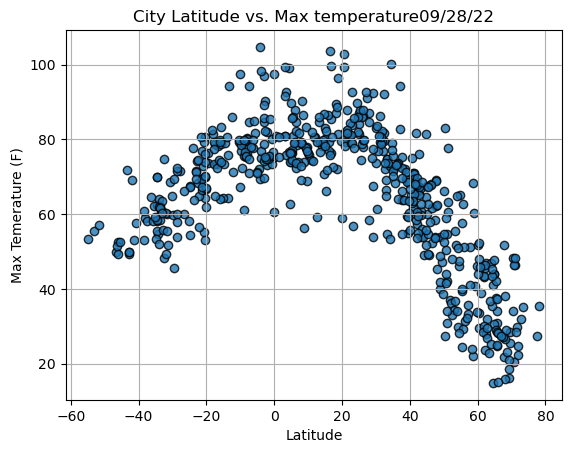

In [16]:
#Import time module
import time

#Build a scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor = "Black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "cities")
#Incorporate other graph properties
plt.title(f"City Latitude vs. Max temperature"+ time.strftime("%x"))
plt.ylabel("Max Temerature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show the plot
plt.show()

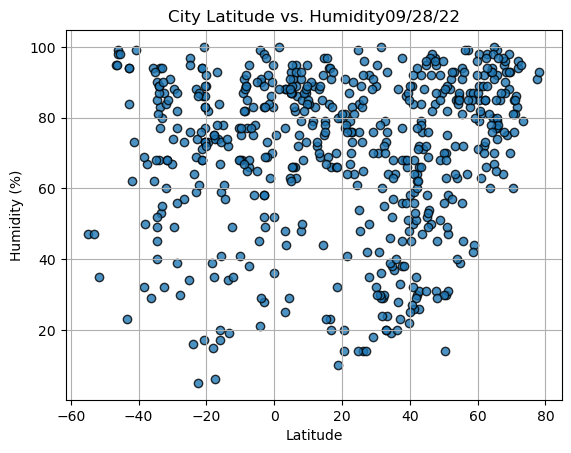

In [17]:
#Import time module
import time

#Build a scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor = "Black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "cities")
#Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show the plot
plt.show()

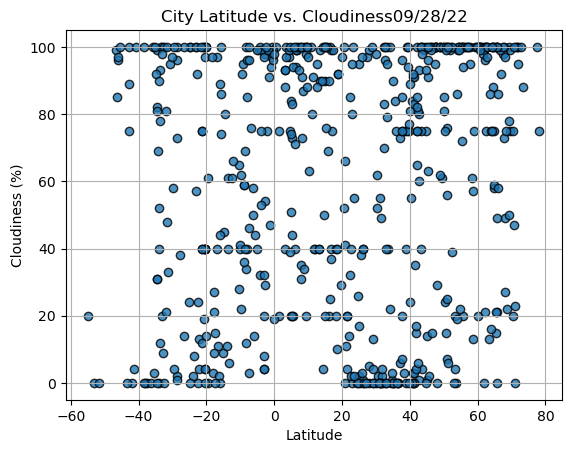

In [18]:
#Import time module
import time

#Build a scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "Black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "cities")
#Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show the plot
plt.show()

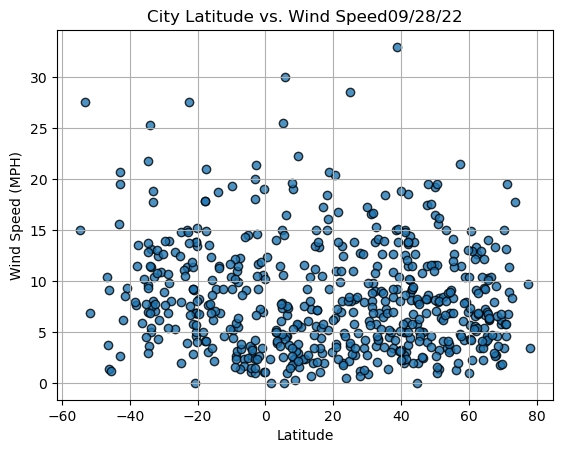

In [19]:
#Import time module
import time

#Build a scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "Black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "cities")
#Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show the plot
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
#Use .loc to get the latitudes in northern hemisphere (positive numbers)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2022-09-28 17:55:21,60.9167,-46.0500,45.82,81,100,2.21
1,Jamestown,US,2022-09-28 17:50:39,42.0970,-79.2353,57.52,64,100,11.50
3,Faya,SA,2022-09-28 17:55:22,18.3851,42.4509,72.12,32,10,5.23
4,Turukhansk,RU,2022-09-28 17:55:22,65.8167,87.9833,24.76,77,21,10.29
5,Tuktoyaktuk,CA,2022-09-28 17:55:23,69.4541,-133.0374,28.40,93,75,5.75


In [22]:
# Import linregress
import scipy.stats
from scipy.stats import linregress

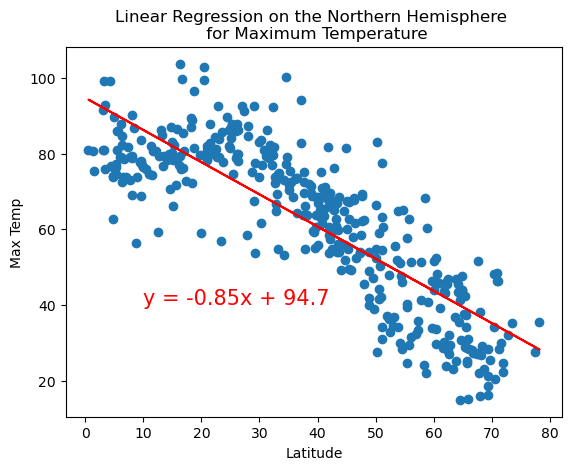

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [24]:
#Use .loc to get the latitudes in Southern hemisphere (negative numbers)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <=0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Arraial Do Cabo,BR,2022-09-28 17:55:21,-22.9661,-42.0278,71.56,88,100,14.97
11,Merauke,ID,2022-09-28 17:55:25,-8.4667,140.3333,78.15,89,100,10.98
12,Saldanha,ZA,2022-09-28 17:55:27,-33.0117,17.9442,60.85,80,100,18.81
15,Isangel,VU,2022-09-28 17:55:28,-19.5500,169.2667,73.81,73,61,8.28
18,Port Alfred,ZA,2022-09-28 17:55:29,-33.5906,26.8910,62.19,94,93,5.01


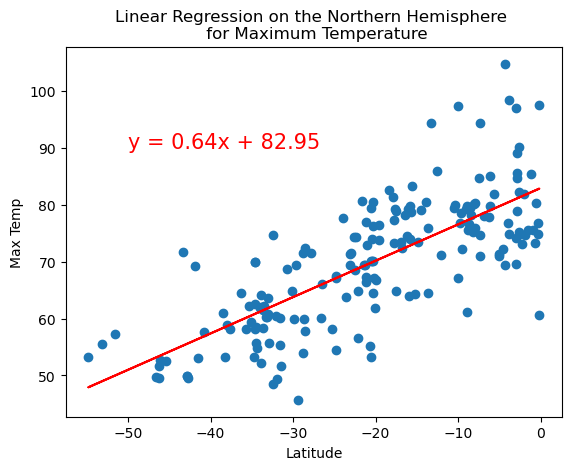

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

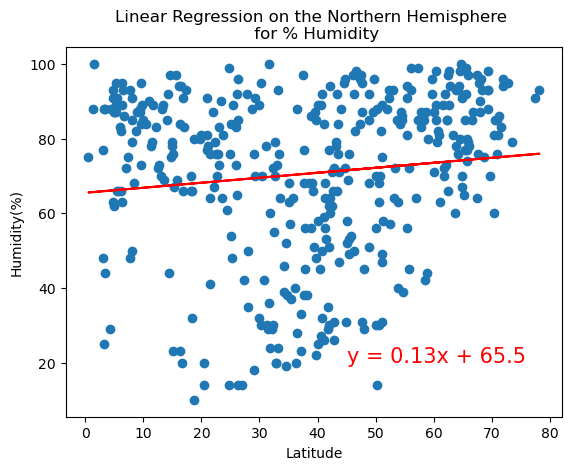

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 'Humidity(%)',(45,20))

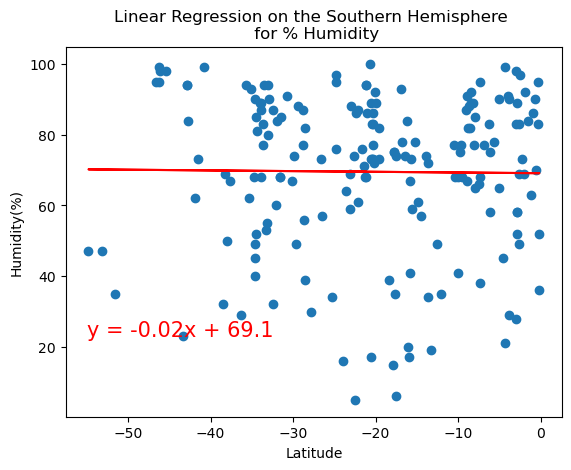

In [27]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 'Humidity(%)',(-55,23))

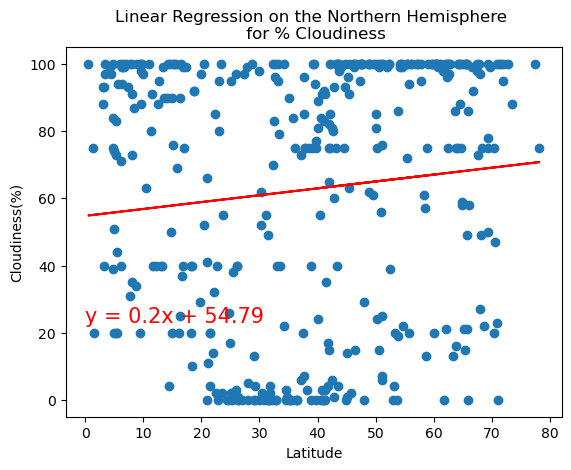

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness(%)',(0,23))

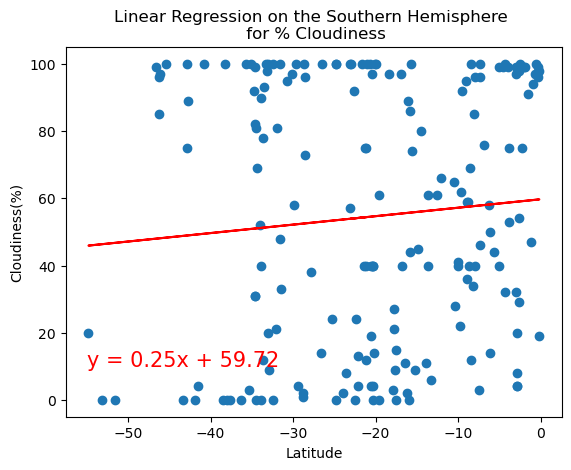

In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness(%)',(-55,10))

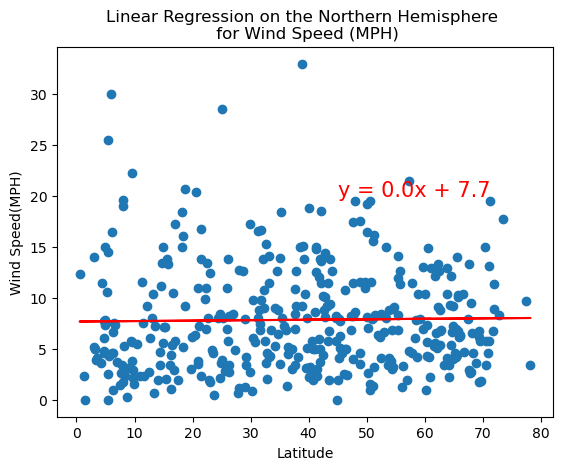

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (MPH)', 'Wind Speed(MPH)',(45,20))

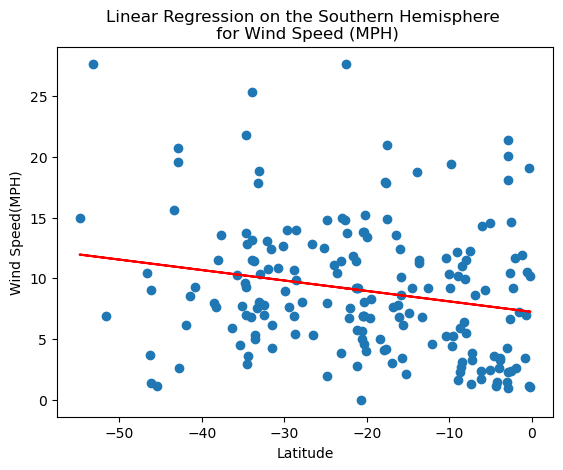

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (MPH)', 'Wind Speed(MPH)',(-45,30))